29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.8348 - loss: 0.4537 - val_accuracy: 0.8691 - val_loss: 0.3634
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8902 - loss: 0.3017 - val_accuracy: 0.8906 - val_loss: 0.2987
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9047 - loss: 0.2570 - val_accuracy: 0.9008 - val_loss: 0.2700
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9172 - loss: 0.2238 - val_accuracy: 0.9007 - val_loss: 0.2689
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9261 - loss: 0.1997 - val_accuracy: 0.9056 - val_loss: 0.2579
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9344 - loss: 0.1753 - val_accuracy: 0.9107 - val_loss: 0.2580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9429 - loss: 0.1552 - val_accuracy: 0.9151 - val_loss: 0.2541
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9470 -

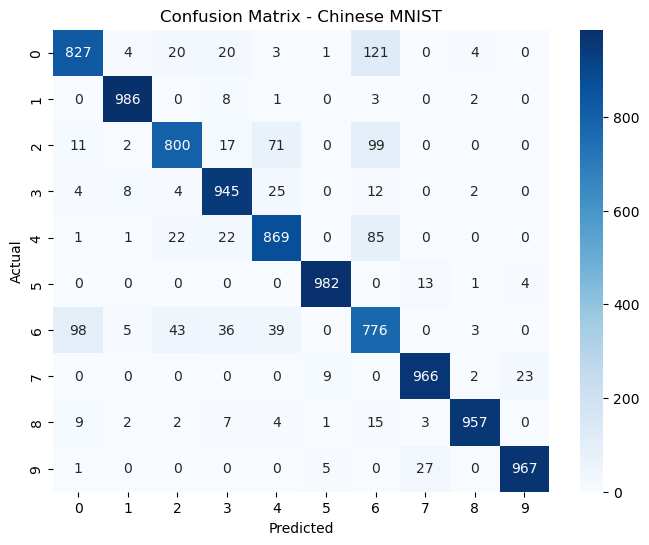

In [1]:
# =========================================
# CNN on Chinese MNIST (Single Code)
# =========================================

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

DATASET_NAME = "Chinese MNIST"

from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

loss, acc = model.evaluate(X_test, y_test)
print("Dataset:", DATASET_NAME)
print("Accuracy:", acc)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Chinese MNIST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 52ms/step - accuracy: 0.7427 - loss: 0.6913 - val_accuracy: 0.7935 - val_loss: 0.5510
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.8144 - loss: 0.4997 - val_accuracy: 0.8181 - val_loss: 0.4711
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8356 - loss: 0.4410 - val_accuracy: 0.8559 - val_loss: 0.4052
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.8495 - loss: 0.4045 - val_accuracy: 0.8688 - val_loss: 0.3650
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8582 - loss: 0.3781 - val_accuracy: 0.8649 - val_loss: 0.3757
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.8650 - loss: 0.3635 - val_accuracy: 0.8710 - val_loss: 0.3534
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.8728 - loss: 0.3394 - val_accuracy: 0.8754 - val_loss: 0.3374
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8758 - loss: 0.3312 - 

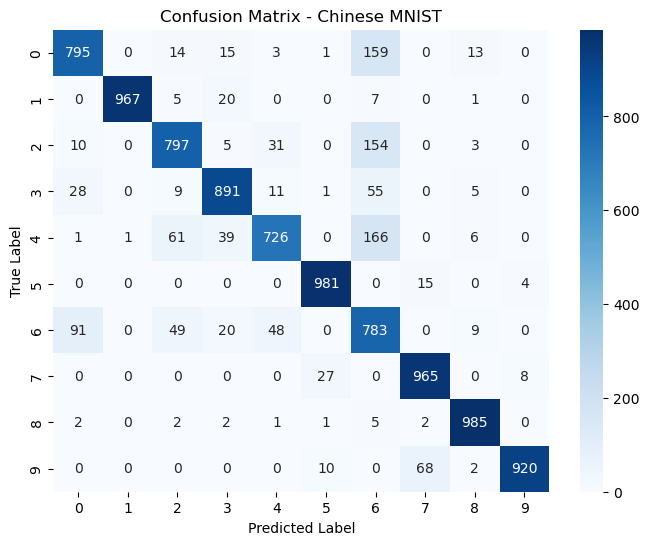

In [2]:
# =========================================
# CNN on Chinese MNIST (Single Code)
# =========================================

# Step 0 — Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# Dataset Name
# -----------------------------------------
DATASET_NAME = "Chinese MNIST"

# -----------------------------------------
# Step 1 — Load Dataset
# -----------------------------------------
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# -----------------------------------------
# Step 2 — Preprocess
# -----------------------------------------
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# -----------------------------------------
# Step 3 — Data Augmentation
# -----------------------------------------
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

# -----------------------------------------
# Step 4 — Build CNN
# -----------------------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# -----------------------------------------
# Step 5 — Compile & Train
# -----------------------------------------
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_test, y_test)
)

# -----------------------------------------
# Step 6 — Evaluate
# -----------------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print("Dataset:", DATASET_NAME)
print("Test Accuracy:", accuracy)

# -----------------------------------------
# Step 7 — Confusion Matrix
# -----------------------------------------
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Chinese MNIST")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# ==================================================
# Mini Project 1 — Is It Food or Not?
# ==================================================

# Step 0 — Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import os

# --------------------------------------------------
# Dataset Name
# --------------------------------------------------
DATASET_NAME = "Is-It-Food-Or-Not"

# --------------------------------------------------
# Step 1 — Load & Resize Images
# --------------------------------------------------
IMG_SIZE = (128, 128)
BATCH_SIZE = 16

train_dir = "Is-It-Food-Or-Not/train"
test_dir = "Is-It-Food-Or-Not/test"

# --------------------------------------------------
# Step 2 & 3 — Normalize + Data Augmentation
# --------------------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

# --------------------------------------------------
# Step 4 — Build Small CNN
# --------------------------------------------------
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# --------------------------------------------------
# Step 5 — Compile & Train
# --------------------------------------------------
model.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

# --------------------------------------------------
# Step 6 — Evaluate
# --------------------------------------------------
loss, accuracy = model.evaluate(test_data)
print("\nDataset:", DATASET_NAME)
print("Test Accuracy:", accuracy)

# --------------------------------------------------
# Step 7 — Test on Real Photo
# --------------------------------------------------
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        label = "Food 🍕"
        confidence = prediction * 100
    else:
        label = "Non-Food 📱"
        confidence = (1 - prediction) * 100

    print("\nPrediction Result")
    print("-----------------")
    print("Class:", label)
    print("Confidence: {:.2f}%".format(confidence))

# Example:
# predict_image("my_photo.jpg")


In [ ]:
# ==================================================
# Mini Project 2 — Face Mask Detector
# ==================================================

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score
import os

DATASET_NAME = "Face-Mask-Dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_dir = "Face-Mask-Dataset/train"
test_dir = "Face-Mask-Dataset/test"

# Data Augmentation + Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(train_data, epochs=10, validation_data=test_data)

# Evaluation
y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype("int32")

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("\nDataset:", DATASET_NAME)
print("Precision:", precision)
print("Recall:", recall)


In [ ]:
# ==================================================
# Mini Project 3 — Handwritten Alphabet Recognizer
# ==================================================

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

DATASET_NAME = "EMNIST-Alphabet"

# Load EMNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.emnist.load_data(split="letters")

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Labels: 1–26 → 0–25
y_train -= 1
y_test -= 1

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(26, activation="softmax")
])

model.compile(
    optimizer=Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# --------------------------------------------------
# Visualize Feature Maps
# --------------------------------------------------
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(X_test[:1])

plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(activations[0][0,:,:,i], cmap="gray")
    plt.axis("off")
plt.show()

# --------------------------------------------------
# Predict Custom Drawing
# --------------------------------------------------
def predict_letter(img):
    img = img.reshape(1,28,28,1) / 255.0
    pred = model.predict(img)
    letter = chr(np.argmax(pred) + ord('A'))
    print("Predicted Letter:", letter)
